In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import files
uploaded= files.upload()

Saving forestfires.csv to forestfires.csv


In [6]:
df = pd.read_csv(r"/content/forestfires.csv")

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [9]:
df.drop(df.columns[11:-1], axis=1,inplace= True)

In [10]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [12]:
df.isna().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [13]:
df.duplicated().sum()

8

In [14]:
df[df.duplicated(keep=False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
214,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
302,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
cat_cols = df.select_dtypes(object).columns

In [18]:
oe = OrdinalEncoder()
df[cat_cols] = oe.fit_transform(df[cat_cols])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7.0,0.0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1.0
1,10.0,5.0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1.0
2,10.0,2.0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1.0
3,7.0,0.0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1.0
4,7.0,3.0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1.0,3.0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0
513,1.0,3.0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.0
514,1.0,3.0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.0
515,1.0,2.0,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1.0


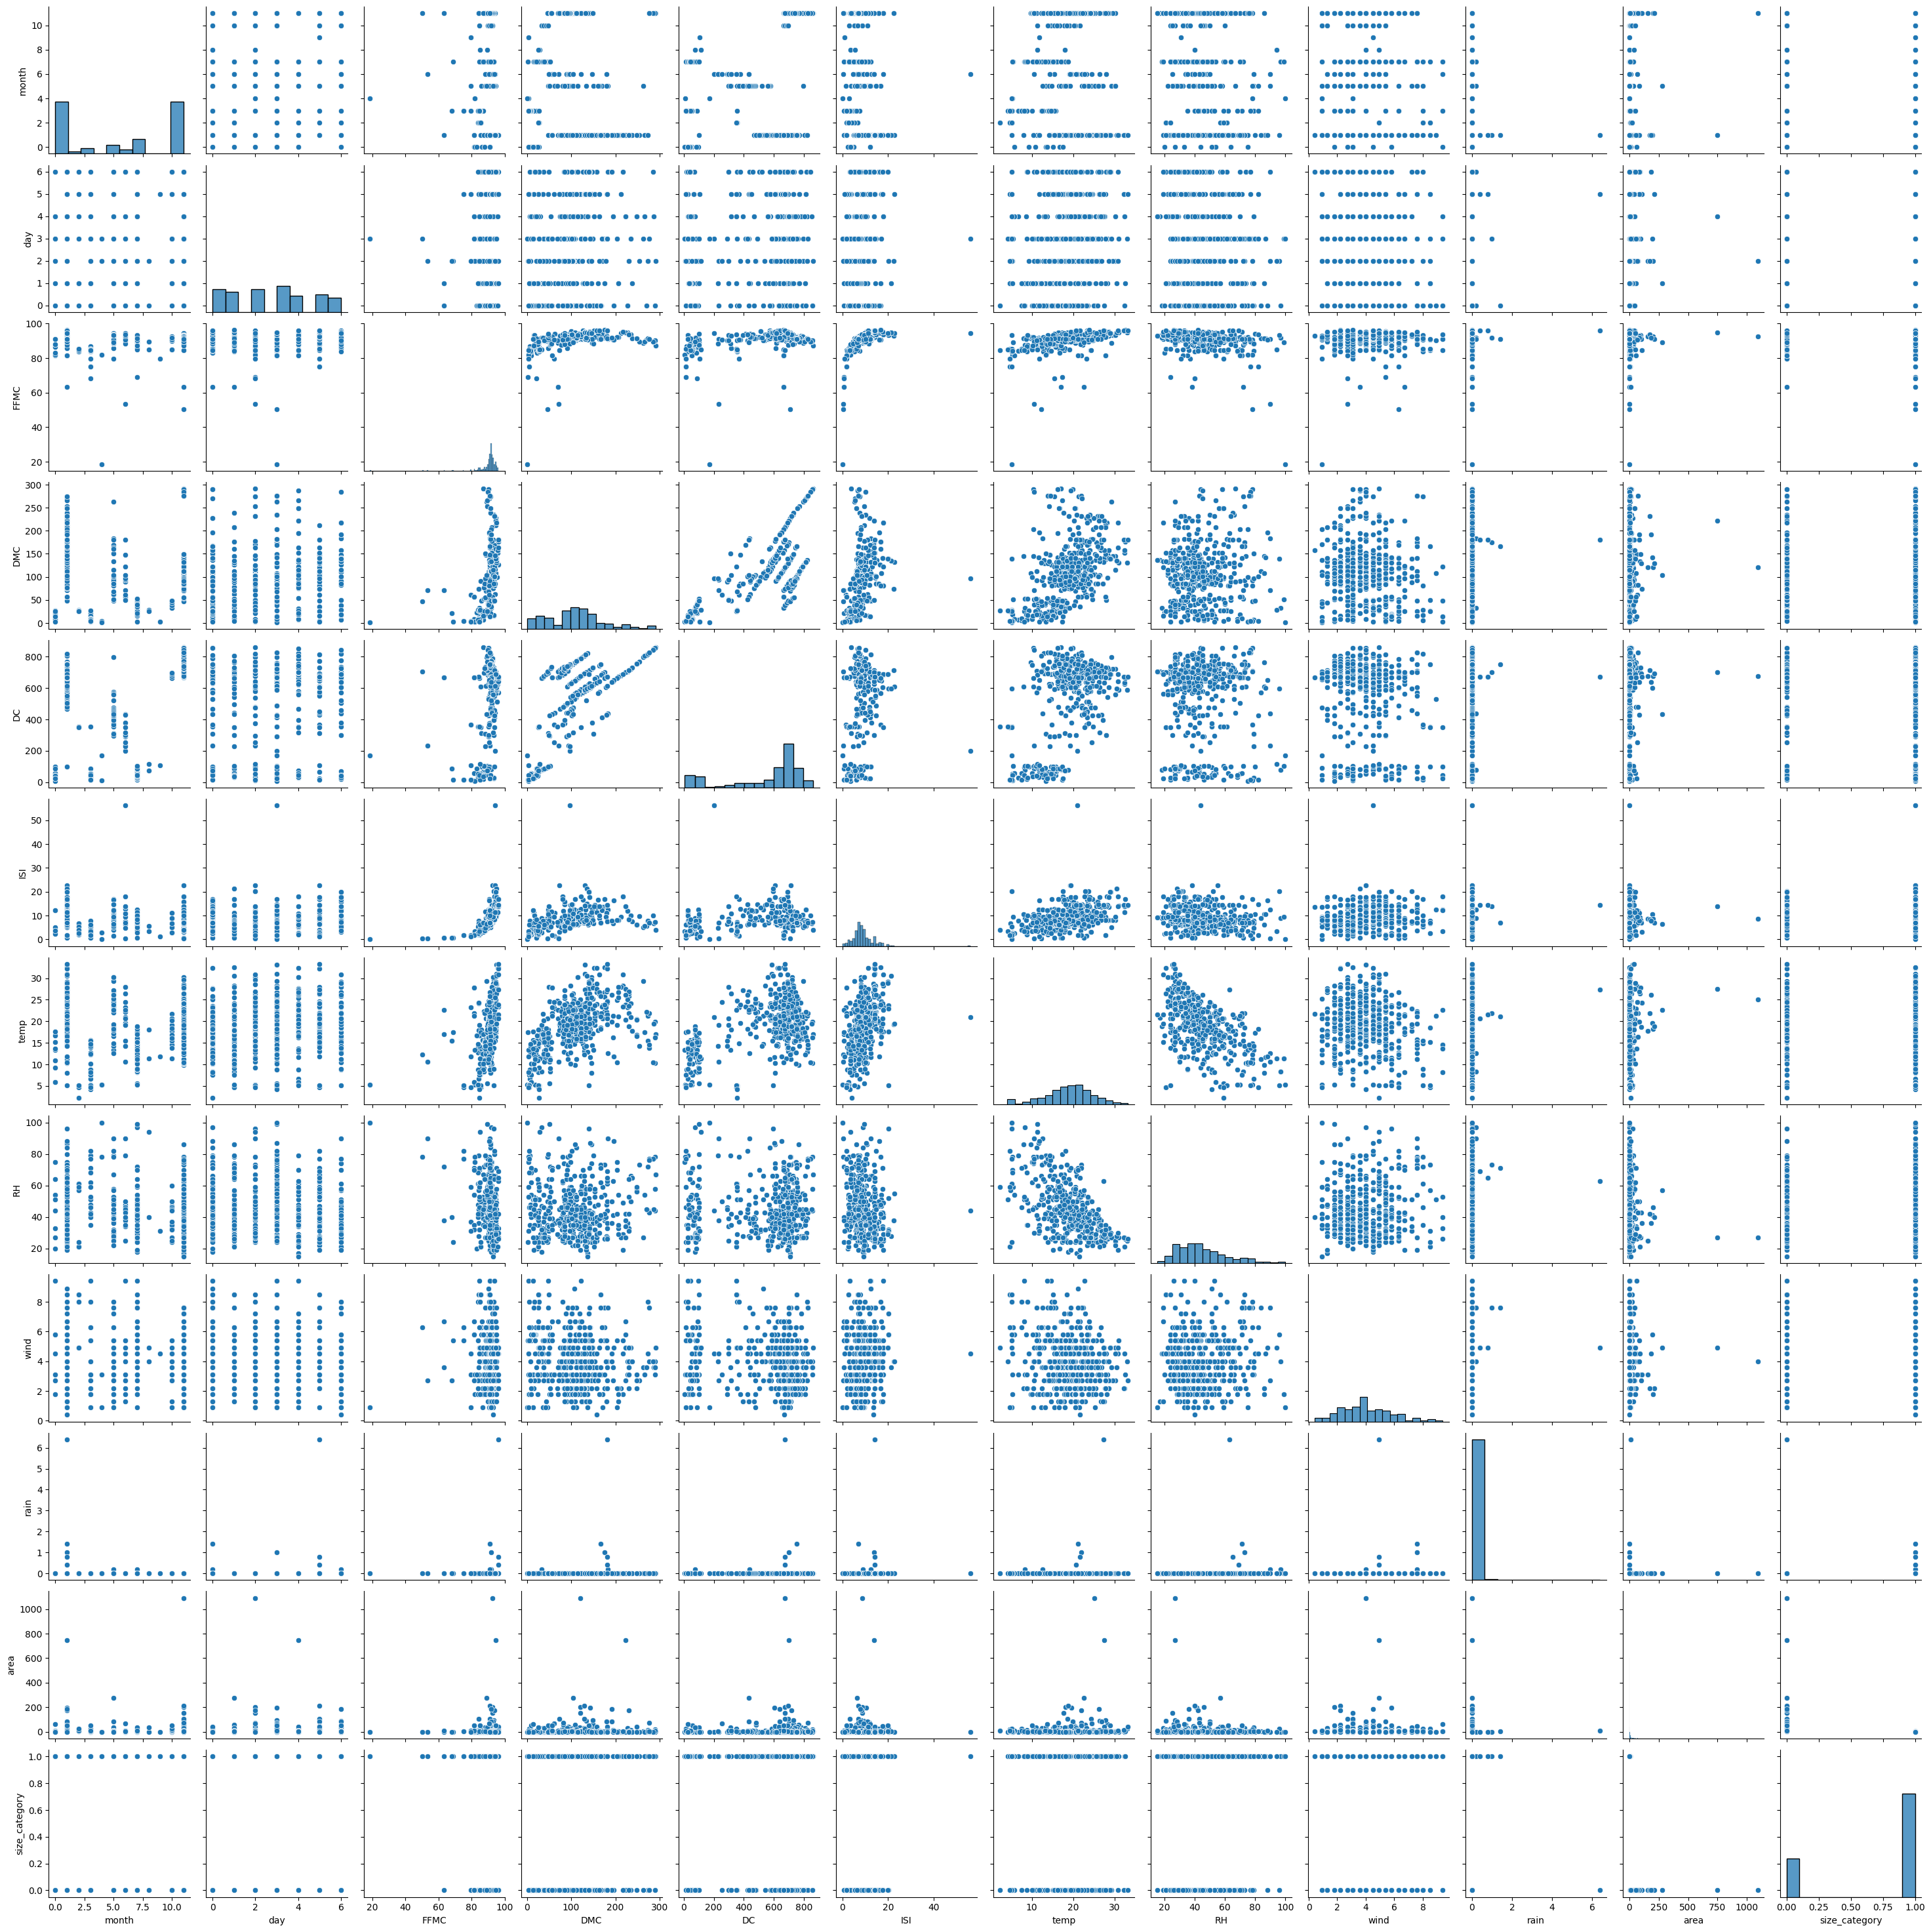

In [19]:
sns.pairplot(df)

<Axes: >

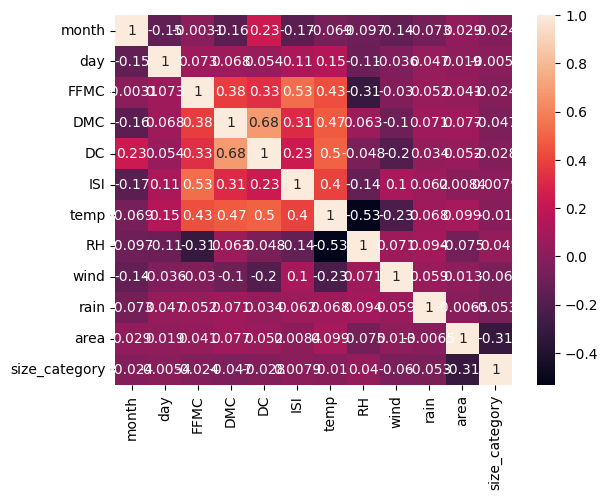

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.25,
                                                random_state=2)

In [24]:
# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=30, activation='relu'))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

In [25]:
model = ann.fit(xtrain, ytrain,validation_data=(xtest,ytest), epochs=500)

Epoch 1/500
12/12 [==============================] - 3s 23ms/step - loss: 0.6577 - val_loss: 0.6590
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6091 - val_loss: 0.6532
Epoch 3/500
12/12 [==============================] - 0s 11ms/step - loss: 0.5829 - val_loss: 0.6478
Epoch 4/500
12/12 [==============================] - 0s 10ms/step - loss: 0.5628 - val_loss: 0.6272
Epoch 5/500
12/12 [==============================] - 0s 9ms/step - loss: 0.5454 - val_loss: 0.6168
Epoch 6/500
12/12 [==============================] - 0s 10ms/step - loss: 0.5299 - val_loss: 0.6025
Epoch 7/500
12/12 [==============================] - 0s 13ms/step - loss: 0.5151 - val_loss: 0.5909
Epoch 8/500
12/12 [==============================] - 0s 15ms/step - loss: 0.5047 - val_loss: 0.5765
Epoch 9/500
12/12 [==============================] - 0s 11ms/step - loss: 0.4898 - val_loss: 0.5596
Epoch 10/500
12/12 [==============================] - 0s 10ms/step - loss: 0.4782 - val_loss: 0.5561
E

In [26]:
ypred = ann.predict(xtest)
ypred = ypred > 0.5
ypred

4/4 [==============================] - 1s 5ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [27]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        39
         1.0       0.94      0.96      0.95        89

    accuracy                           0.93       128
   macro avg       0.92      0.91      0.92       128
weighted avg       0.93      0.93      0.93       128



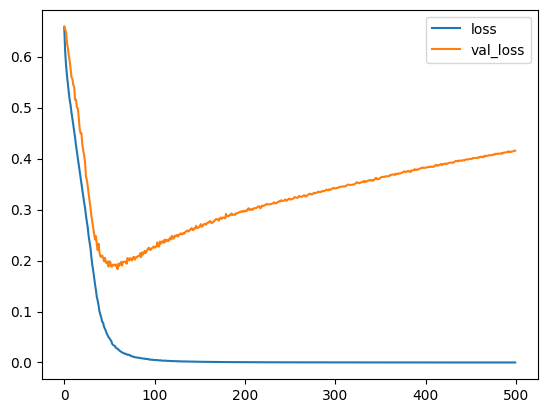

In [28]:
val_loss = pd.DataFrame(model.history)
plt.plot(val_loss)
plt.legend(val_loss)

Hyperparameter Tunning

In [29]:
# Early Stopping
early = EarlyStopping(monitor= 'val_loss', mode='min', patience=10)

In [30]:
# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=30, activation='relu'))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

# Fit data
model = ann.fit(xtrain, ytrain,callbacks=[early], validation_data=(xtest, ytest), epochs=500)

# Make Predictions
ypred = ann.predict(xtest)

Epoch 1/500
12/12 [==============================] - 2s 30ms/step - loss: 0.6698 - val_loss: 0.6401
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6067 - val_loss: 0.6182
Epoch 3/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5754 - val_loss: 0.6091
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5548 - val_loss: 0.6060
Epoch 5/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5392 - val_loss: 0.5956
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5226 - val_loss: 0.5885
Epoch 7/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5090 - val_loss: 0.5787
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.4953 - val_loss: 0.5676
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4830 - val_loss: 0.5574
Epoch 10/500
12/12 [==============================] - 0s 7ms/step - loss: 0.4655 - val_loss: 0.5416
Epoch 11

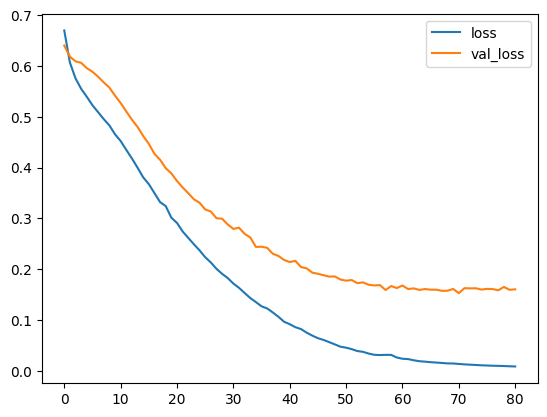

In [31]:
early_loss = pd.DataFrame(model.history)
plt.plot(early_loss)
plt.legend(early_loss)

In [32]:
# Drop out layer
# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.25))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

# Fit data
model = ann.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=500)

# Make Predictions
ypred = ann.predict(xtest)

Epoch 1/500
12/12 [==============================] - 2s 19ms/step - loss: 0.7333 - val_loss: 0.6960
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6868 - val_loss: 0.6714
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6700 - val_loss: 0.6528
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6237 - val_loss: 0.6410
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6263 - val_loss: 0.6318
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6077 - val_loss: 0.6239
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6184 - val_loss: 0.6190
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5984 - val_loss: 0.6149
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5838 - val_loss: 0.6121
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5755 - val_loss: 0.6102
Epoch 11

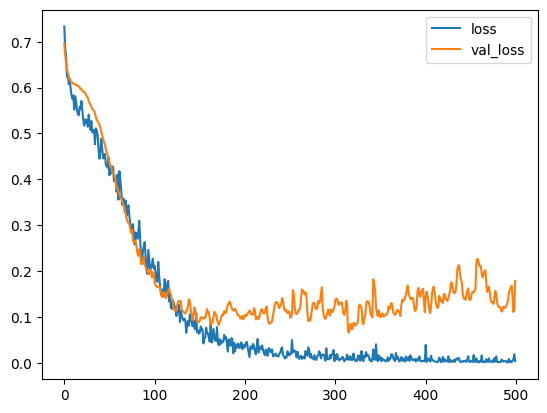

In [33]:
drop_loss = pd.DataFrame(model.history)
plt.plot(drop_loss)
plt.legend(drop_loss)

In [34]:
# Early Stoping + Drop out layer

# Initialize ann model
ann = Sequential()

# Add hidden data
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.25))

# Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Establish the connection between Layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

# Fit data
model = ann.fit(xtrain, ytrain,callbacks=[early], validation_data=(xtest, ytest), epochs=500)

# Make Predictions
ypred = ann.predict(xtest)

Epoch 1/500
12/12 [==============================] - 3s 58ms/step - loss: 0.6878 - val_loss: 0.6444
Epoch 2/500
12/12 [==============================] - 0s 16ms/step - loss: 0.6612 - val_loss: 0.6286
Epoch 3/500
12/12 [==============================] - 0s 8ms/step - loss: 0.6384 - val_loss: 0.6214
Epoch 4/500
12/12 [==============================] - 0s 8ms/step - loss: 0.6456 - val_loss: 0.6159
Epoch 5/500
12/12 [==============================] - 0s 9ms/step - loss: 0.6159 - val_loss: 0.6113
Epoch 6/500
12/12 [==============================] - 0s 10ms/step - loss: 0.6193 - val_loss: 0.6079
Epoch 7/500
12/12 [==============================] - 0s 11ms/step - loss: 0.5954 - val_loss: 0.6052
Epoch 8/500
12/12 [==============================] - 0s 8ms/step - loss: 0.5951 - val_loss: 0.6019
Epoch 9/500
12/12 [==============================] - 0s 11ms/step - loss: 0.6023 - val_loss: 0.5990
Epoch 10/500
12/12 [==============================] - 0s 8ms/step - loss: 0.5872 - val_loss: 0.5967
Epoc

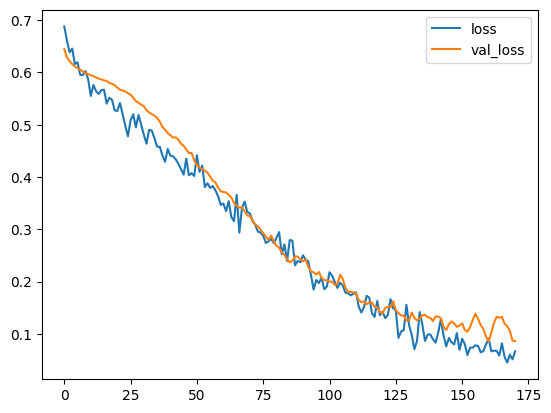

In [35]:
de_loss = pd.DataFrame(model.history)
plt.plot(de_loss)
plt.legend(de_loss)

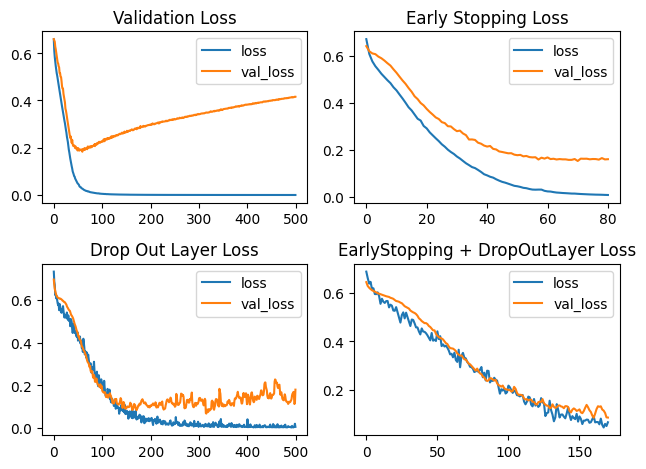

In [36]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.legend(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.legend(early_loss)
plt.title('Early Stopping Loss')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.legend(drop_loss)
plt.title('Drop Out Layer Loss')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.legend(de_loss)
plt.title('EarlyStopping + DropOutLayer Loss')

plt.tight_layout()